## Image Enhancement using Multi-Scale Retinex Method 

Retinex is the theory of human color vision proposed by Edwin Land to account for color sensations in real scenes.

[Retinex model](https://www.sciencedirect.com/topics/computer-science/retinex-theory) is based on the following three assumptions:

- The real world is colorless, and the color we perceive is the result of the interaction of light and matter. The water we see   is colorless, but the water film-soap film is colorful, which is the result of light interference on the surface of the film.

- Each color region is composed of three primary colors of red, green and blue of a given wavelength;

- The three primary colors determine the color of each unit area.

The basic theory of Retinex theory is that the color of an object is determined by the ability of the object to reflect light in long (red), medium (green), and short (blue) light, rather than by the absolute value of the intensity of the reflected light. 

The color of the object is not affected by the illumination non-uniformity, and the retinex is based on the consistency of color perception (color constancy). 

Unlike traditional linear and nonlinear methods that only enhance a certain type of image, Retinex can balance dynamic range compression, edge enhancement and color constancy, so it can adapt to different types of image enhancement.

In [1]:
#importing necessary libraries 

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#creating a single scale retinex (SSR) function 

def single_scale_retinex(img, sigma):
    retinex = np.log10(img + 1) - np.log10(cv2.GaussianBlur(img, (0, 0), sigma) + 1)
    return retinex

In [3]:
#Creating a Multi Scale Retinex (MSR) Function     

def multi_scale_retinex(img, sigmas):
    retinex = np.zeros_like(img)
    for sigma in sigmas:
        retinex += single_scale_retinex(img, sigma)
    retinex = retinex / len(sigmas)
    return retinex

SSR precedes MSR because it provides a crucial step in enhancing local contrast and controlling dynamic range, while MSR further refines color perception and approximates human visual processing.

In [4]:
def color_restoration(img, alpha, beta):
    img_sum = np.sum(img, axis=2, keepdims=True)
    img_sum[img_sum == 0] = 1
    color_restored = beta * (np.log10(alpha * img + 1) - np.log10(img_sum + 1))
    return color_restored

In [5]:
def automatic_gain_offset(img, low_perc, high_perc):
    n = img.shape[0] * img.shape[1]
    flat = img.flatten()
    flat.sort()
    low_val = flat[int(n * low_perc)]
    high_val = flat[int(n * high_perc)]
    img = np.clip((img - low_val) / (high_val - low_val), 0, 1)
    return img

In [6]:
def msrcr(img, sigmas=[15, 80, 250], alpha=125, beta=46, low_perc=0.01, high_perc=0.99):
    img = img.astype(np.float32) + 1.0
    img_retinex = multi_scale_retinex(img, sigmas)
    img_color = color_restoration(img, alpha, beta)
    img_msrcr = img_retinex * img_color
    img_msrcr = automatic_gain_offset(img_msrcr, low_perc, high_perc)
    img_msrcr = np.clip(img_msrcr, 0, 1)
    img_msrcr = np.uint8(img_msrcr * 255)
    return img_msrcr

In [7]:
img = cv2.imread(r"C:\Users\Thushar Mohan\OneDrive\Desktop\Test.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [14]:
# Apply MSRCR

sigmas = [10, 50, 100, 200] 
alpha = 100
beta = 20
low_perc = 0.005
high_perc = 0.995

enhanced_img = msrcr(img, sigmas=sigmas, alpha=alpha, beta=beta, low_perc=low_perc, high_perc=high_perc)


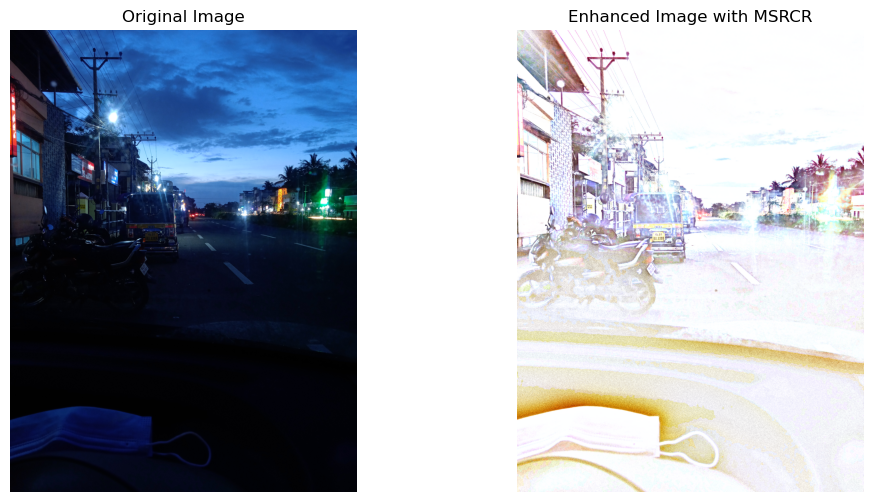

In [15]:
# Display the original and enhanced images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Enhanced Image with MSRCR')
plt.imshow(enhanced_img)
plt.axis('off')

plt.show()